In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [259]:
df_train = pd.read_csv('train_data.csv')
df_test = pd.read_csv('test_features.csv')
names = df_test['name']
train_Y = df_train['poi']
df_train = df_train.drop(columns=['name','poi']) #poi 為訓練的feature
df_test = df_test.drop(columns=['name'])
df = pd.concat([df_train, df_test])
train = len(df_train)

In [260]:
df.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,8.200000e+01,3.900000e+01,4.900000e+01,1.700000e+01,1.020000e+02,9.500000e+01,86.000000,86.000000,86.000000,4.000000e+00,6.600000e+01,9.300000e+01,1.100000e+02,1.800000e+01,9.500000e+01,86.000000,86.000000,1.250000e+02,1.260000e+02
mean,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.087289e+05,608.790698,64.895349,41.232558,4.196250e+07,1.470361e+06,9.190650e+05,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,5.081526e+06,6.773957e+06
std,1.071333e+07,5.161930e+06,4.025406e+06,3.198914e+05,3.106201e+07,5.335348e+05,1841.033949,86.979244,100.073111,4.708321e+07,5.942759e+06,4.589253e+06,1.251828e+07,4.201494e+06,2.716369e+06,1178.317641,2582.700981,2.906172e+07,3.895777e+07
min,7.000000e+04,-1.025000e+05,-2.799289e+07,3.285000e+03,3.285000e+03,1.480000e+02,12.000000,0.000000,0.000000,4.000000e+05,6.922300e+04,2.000000e+00,-2.604490e+06,-7.576788e+06,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.312500e+05,8.157300e+04,-6.948620e+05,9.878400e+04,5.278862e+05,2.261400e+04,22.750000,10.000000,1.000000,1.600000e+06,2.812500e+05,1.215000e+03,2.540180e+05,-3.896218e+05,2.118160e+05,249.750000,541.250000,3.944750e+05,4.945102e+05
50%,7.693750e+05,2.274490e+05,-1.597920e+05,1.085790e+05,1.310814e+06,4.695000e+04,41.000000,35.000000,8.000000,4.176250e+07,4.420350e+05,5.238200e+04,4.517400e+05,-1.469750e+05,2.599960e+05,740.500000,1211.000000,1.101393e+06,1.102872e+06
75%,1.200000e+06,1.002672e+06,-3.834600e+04,1.137840e+05,2.547724e+06,7.995250e+04,145.500000,72.250000,24.750000,8.212500e+07,9.386720e+05,3.620960e+05,1.002370e+06,-7.500975e+04,3.121170e+05,1888.250000,2634.750000,2.093263e+06,2.949847e+06
max,9.734362e+07,3.208340e+07,-8.330000e+02,1.398517e+06,3.117640e+08,5.235198e+06,14368.000000,528.000000,609.000000,8.392500e+07,4.852193e+07,4.266759e+07,1.303223e+08,1.545629e+07,2.670423e+07,5521.000000,15149.000000,3.098866e+08,4.345095e+08


In [261]:
payment_list_all = ['bonus','deferral_payments','deferred_income','director_fees','expenses',
          'loan_advances','long_term_incentive','other', 'salary', 'total_payments']
payment_list = ['bonus','deferral_payments','deferred_income','director_fees','expenses',
          'loan_advances','long_term_incentive','other']

In [262]:
for element in payment_list:
    df[element].fillna(0, inplace = True )

mean = df['salary'].mean()
df['salary'].fillna(mean, inplace = True)
df[payment_list].isnull().sum()

bonus                  0
deferral_payments      0
deferred_income        0
director_fees          0
expenses               0
loan_advances          0
long_term_incentive    0
other                  0
dtype: int64

In [263]:
df[payment_list] = df[payment_list].apply(lambda x: abs(x))

In [264]:
payment_list.append('salary')
payment_list
df['total_payments'] = df[payment_list].sum(axis = 1)

In [265]:
df[payment_list_all].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146 entries, 0 to 32
Data columns (total 10 columns):
bonus                  146 non-null float64
deferral_payments      146 non-null float64
deferred_income        146 non-null float64
director_fees          146 non-null float64
expenses               146 non-null float64
loan_advances          146 non-null float64
long_term_incentive    146 non-null float64
other                  146 non-null float64
salary                 146 non-null float64
total_payments         146 non-null float64
dtypes: float64(10)
memory usage: 12.5 KB


In [266]:
df[payment_list_all].describe()

,bonus,deferral_payments,deferred_income,director_fees,expenses,loan_advances,long_term_incentive,other,salary,total_payments
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02
mean,1.333474e+06,4.402006e+05,3.827622e+05,1.942249e+04,7.074827e+04,1.149658e+06,6.646839e+05,5.854318e+05,5.621943e+05,5.208575e+06
std,8.094029e+06,2.741099e+06,2.378250e+06,1.190543e+05,4.327163e+05,9.649342e+06,4.046072e+06,3.682345e+06,2.187100e+06,3.134022e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.770000e+02,1.115290e+05
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.398005e+05,6.835363e+05
50%,3.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,2.018200e+04,0.000000e+00,0.000000e+00,9.595000e+02,3.233105e+05,1.119315e+06
75%,8.000000e+05,1.500425e+04,3.792600e+04,0.000000e+00,5.374075e+04,0.000000e+00,3.750648e+05,1.506065e+05,5.621943e+05,2.135571e+06
max,9.734362e+07,3.208340e+07,2.799289e+07,1.398517e+06,5.235198e+06,8.392500e+07,4.852193e+07,4.266759e+07,2.670423e+07,3.658724e+08


In [267]:
np.log1p(df[payment_list]).isnull().sum()

bonus                  0
deferral_payments      0
deferred_income        0
director_fees          0
expenses               0
loan_advances          0
long_term_incentive    0
other                  0
salary                 0
dtype: int64

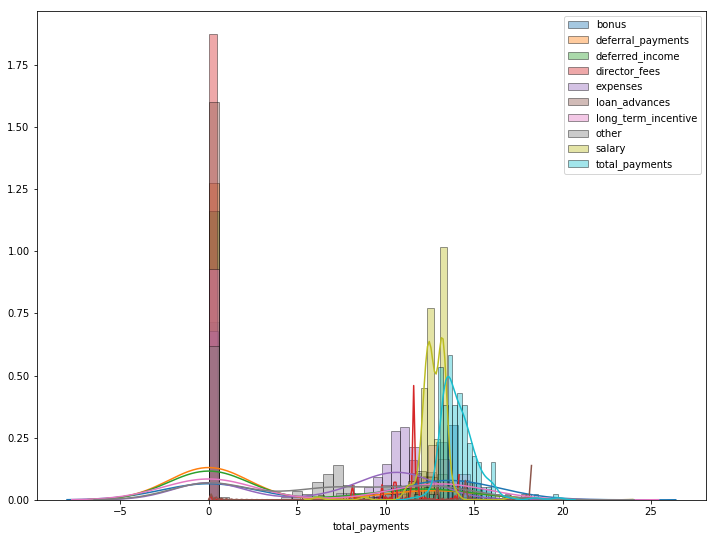

In [268]:
plt.figure(figsize = (12,9))
for element in payment_list_all:
    try:
        sns.distplot(np.log1p(df[element]), label = element, bins = 30, hist_kws={'edgecolor':'black'})
    except:
        print(element, "doesn't work.")
plt.legend()

In [269]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [270]:
train_Y.replace({True:1, False:0}, inplace = True) #把feature處理成0與1來預測

In [271]:
np.log1p(df.drop(df['deferral_payments']<0)[payment_list_all][:train]).head()

,bonus,deferral_payments,deferred_income,director_fees,expenses,loan_advances,long_term_incentive,other,salary,total_payments
1,15.538277,0.000000,0.000000,0.0,10.286605,0.0,14.467836,10.004373,13.921004,15.976845
2,12.206078,0.000000,8.335192,0.0,10.038237,0.0,0.000000,14.268702,12.263610,14.514749
3,13.592368,0.000000,0.000000,0.0,11.679583,0.0,13.309128,13.718452,12.320766,14.791056
4,14.038655,0.000000,12.478010,0.0,10.486234,0.0,12.835494,6.188264,12.389186,14.587607
5,0.000000,9.236008,0.000000,0.0,11.264195,0.0,0.000000,7.957527,13.239605,13.389774


In [272]:
X_train, X_test, y_train, y_test = train_test_split(np.log1p(df[payment_list_all][:train]), 
                                                    train_Y, test_size=0.33, random_state=42)
regr = LogisticRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)
scores = cross_val_score(regr, np.log1p(df[payment_list_all][:train]), train_Y, cv = 5).mean()
print('cvs:', scores)

Accuracy: 0.7631578947368421
cvs: 0.8059288537549406


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [273]:
regr = LogisticRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

Accuracy: 0.7631578947368421


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [274]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [275]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

Accuracy: 0.7631578947368421


In [276]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

Accuracy: 0.8421052631578947


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [277]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

Accuracy: 0.7894736842105263


In [278]:
df['restricted_stock'].fillna(0, inplace = True)
df['exercised_stock_options'].fillna(0, inplace = True)
df['restricted_stock_deferred'].fillna(0, inplace = True)
df['total_stock_value'] = df[['restricted_stock','exercised_stock_options','restricted_stock_deferred']].sum(axis= 1)

In [279]:
stock_list = ['restricted_stock','exercised_stock_options','restricted_stock_deferred','total_stock_value']

In [280]:
df[stock_list] = df[stock_list].apply(lambda x: abs(x))

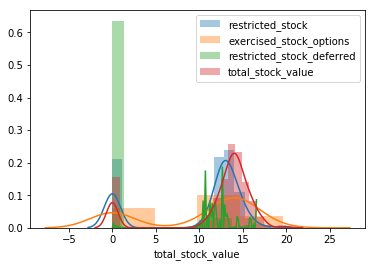

In [281]:
for element in stock_list:
    try:
        sns.distplot(np.log1p(df[element]), label = element)
    except:
        print(element, "is not working.")
plt.legend()

In [282]:
np.log1p(df[payment_list_all+stock_list][:train]).isnull().sum()

bonus                        0
deferral_payments            0
deferred_income              0
director_fees                0
expenses                     0
loan_advances                0
long_term_incentive          0
other                        0
salary                       0
total_payments               0
restricted_stock             0
exercised_stock_options      0
restricted_stock_deferred    0
total_stock_value            0
dtype: int64

In [312]:
X_train, X_test, y_train, y_test = train_test_split(np.log1p(df[payment_list_all+stock_list+email_list][:train]), 
                                                    train_Y, test_size=0.33, random_state=42)

In [313]:
regr = LogisticRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

Accuracy: 0.8157894736842105


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [314]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

Accuracy: 0.7631578947368421


In [315]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

Accuracy: 0.8421052631578947


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [316]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

Accuracy: 0.7631578947368421


In [288]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [317]:
n_estimators = [50, 100, 150]
max_depth = [1, 3, 5]
param_grid = dict(n_estimators = n_estimators, max_depth = max_depth)

grid_search = GridSearchCV(gbc, param_grid, scoring = 'accuracy',n_jobs = -1, verbose =1)

grid_result = grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    5.1s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [318]:
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.906667 using {'max_depth': 1, 'n_estimators': 50}


In [319]:
grid_result.best_params_

{'max_depth': 1, 'n_estimators': 50}

In [320]:
gbc_best = GradientBoostingClassifier(max_depth=grid_result.best_params_['max_depth'],
                                     n_estimators=grid_result.best_params_['n_estimators'])
gbc_best.fit(X_train, y_train)
y_pred = gbc_best.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy:',acc)

Accuracy: 0.7631578947368421


In [322]:
train_X=df[payment_list_all+stock_list+email_list][:train]
test_X=df[payment_list_all+stock_list+email_list][train:]
#gbc_best = GradientBoostingClassifier(max_depth=grid_result.best_params_['max_depth'],
                                     #n_estimators=grid_result.best_params_['n_estimators'])
rfc = RandomForestClassifier()
rfc.fit(train_X, train_Y)
pred_Y = rfc.predict(test_X)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [323]:
sub = pd.DataFrame({'name':names,'poi':pred_Y})
sub.to_csv('midterm_rfc.csv', index = False)

In [300]:
email_list = ['from_messages', 'from_poi_to_this_person', 
              'from_this_person_to_poi','shared_receipt_with_poi',
             'to_messages']

In [302]:
for element in email_list:
    df[element].fillna(0, inplace = True)

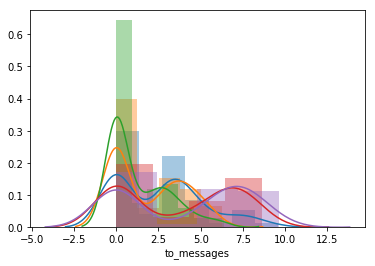

In [306]:
for element in email_list:
    sns.distplot(np.log1p(df[element]))

In [311]:
np.log1p(df[payment_list_all+stock_list+email_list][:train]).isnull().sum()

bonus                        0
deferral_payments            0
deferred_income              0
director_fees                0
expenses                     0
loan_advances                0
long_term_incentive          0
other                        0
salary                       0
total_payments               0
restricted_stock             0
exercised_stock_options      0
restricted_stock_deferred    0
total_stock_value            0
from_messages                0
from_poi_to_this_person      0
from_this_person_to_poi      0
shared_receipt_with_poi      0
to_messages                  0
dtype: int64